# Individual project - investigating correlation between bacterial species in the microbiome and age. 

## Reading in and cleaning up the data

In [1]:


import pandas as pd

data = pd.read_csv("microbiome data.csv", skiprows=3)
# Reading in the dataset - need to make this a link

classification = data["Unnamed: 0"].str.split(";", expand=True)
# Split bacterial type column into separate classifications

group_data = (data[["Group 1", "Group 2", "Group 3", "Group 4", "Group 10", "Group 20", "Group 30", "Group 40", "Group 50", "Group 60", "Group 70", "Group 80", "Group 90", "Group 100"]])
# Specify numerical group data

group_columns = [f"Group {i}" for i in [1, 2, 3, 4, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]]

group_data_split = pd.concat([group_data[col].str.split("(", expand=True)[0] for col in group_columns], axis=1)
# Remove numbers in brackets from numerical group data

group_data_split.columns=["Group 1", "Group 2", "Group 3", "Group 4", "Group 10", "Group 20", "Group 30", "Group 40", "Group 50", "Group 60", "Group 70", "Group 80", "Group 90", "Group 100"]
# Rename group data columns

sep_data = pd.concat([classification, group_data_split], join="outer", axis=1)
# Add separate classification data to the group columns 

sep_data = sep_data.rename(columns={0:"Kingdom", 1:"Phylum", 2:"Class", 3:"Order", 4:"Family", 5:"Genus"})
# Name each classification column

sep_data

,Kingdom,Phylum,Class,Order,Family,Genus,Group 1,Group 2,Group 3,Group 4,Group 10,Group 20,Group 30,Group 40,Group 50,Group 60,Group 70,Group 80,Group 90,Group 100
0,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__,0.05,0.24,9.95,21.52,20.45,24.63,19.34,16.47,19.81,21.01,14.4,9.02,4.35,2.43
1,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__Blautia,0.07,0.28,15.19,16.83,15.2,18.53,18.35,18.99,19.13,17.08,10.45,7.46,5.86,1.74
2,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Bifidobacteriales,f__Bifidobacteriaceae,g__Bifidobacterium,52.42,42.53,12.92,12.65,12.46,6.11,9.09,10.22,6.89,1.44,2.46,0.93,0.7,0.19
3,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Ruminococcaceae,g__,0.05,0.02,0.67,3.66,7.59,6.94,6.42,6.03,5.19,7.52,4.44,7.21,8.41,3.04
4,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Bacteroides,0.09,0.06,2.32,1.95,0.99,4.94,3.7,1.5,2.15,2.6,14.92,8.36,6.53,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,k__Bacteria,p__Proteobacteria,c__Betaproteobacteria,o__Nitrosomonadales,f__Nitrosomonadaceae,g__,0,0,0,0,0,0,0,0,0,0,0,0,0,0
183,k__Bacteria,p__Proteobacteria,c__Betaproteobacteria,o__Burkholderiales,f__Oxalobacteraceae,g__Janthinobacterium,0,0,0,0,0,0,0,0,0,0,0,0,0,0
184,k__Bacteria,p__Firmicutes,c__Erysipelotrichi,o__Erysipelotrichales,f__Erysipelotrichaceae,g__Clostridium,0,0,0,0,0,0,0,0,0,0,0,0,0,0
185,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Porphyromonadaceae,g__Paludibacter,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2]:
# Just look at one classification 

genus_data = sep_data.drop(["Kingdom", "Phylum", "Class", "Order", "Family"], axis=1)
# Pull out just the genus for each bacteria

bifido_filter = (genus_data["Genus"] == "g__Bifidobacterium")
# Select Bifidobacterium data

genus_data_bifido = genus_data[bifido_filter]

genus_data_bifido

,Genus,Group 1,Group 2,Group 3,Group 4,Group 10,Group 20,Group 30,Group 40,Group 50,Group 60,Group 70,Group 80,Group 90,Group 100
2,g__Bifidobacterium,52.42,42.53,12.92,12.65,12.46,6.11,9.09,10.22,6.89,1.44,2.46,0.93,0.7,0.19


In [3]:
bifido_corr = genus_data_bifido.drop("Genus", axis='columns')
# Remove genus column for correlation analysis

bifido_corr = bifido_corr.rename(columns={"Group 1":0.3, "Group 2":0.8, "Group 3":2.4, "Group 4":6.1, "Group 10":14.1, "Group 20":25.9, "Group 30":33.9, "Group 40":43.8, "Group 50":53.3, "Group 60":63, "Group 70":76.8, "Group 80":83.3, "Group 90":94.2, "Group 100":101.3})
# Assign average age to each group - could add as extra column instead

bifido_corr = bifido_corr.transpose()
# Transpose data

bifido_corr = bifido_corr.reset_index()
# Resetting index so can plot data

bifido_corr = bifido_corr.rename(columns={"index":"Average Age", 2:"Abundance"})
# Renaming columns to label correctly

bifido_corr["Abundance"] = bifido_corr["Abundance"].astype(float)
bifido_corr["Average Age"] = bifido_corr["Average Age"].astype(float)
# Turn columns from strings to float 

bifido_corr

,Average Age,Abundance
0,0.3,52.42
1,0.8,42.53
2,2.4,12.92
3,6.1,12.65
4,14.1,12.46
5,25.9,6.11
6,33.9,9.09
7,43.8,10.22
8,53.3,6.89
9,63.0,1.44


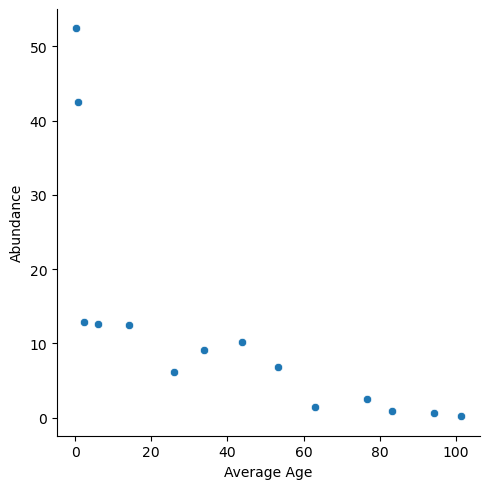

In [4]:
import seaborn as sns

sns.relplot(data = bifido_corr, x="Average Age", y="Abundance")
# Plot average age of each group against abundance of bifidobacterium

In [5]:
bifido_corr.corr()
# Finding correlation between age and abundance of bifidobacterium

,Average Age,Abundance
Average Age,1.000000,-0.707522
Abundance,-0.707522,1.000000


### Now to do this for different genuses of bacteria

In [6]:
genus_data = sep_data.drop(["Kingdom", "Phylum", "Class", "Order", "Family"], axis=1)
# Pull out just the genus for each bacteria

genus_data_1percent = genus_data.loc[0:11]
# Extract the data from genuses that compose on average over 1% of the microbiome across all ages

# Should rename columns to be family and genus here 

genus_data_1percent

,Genus,Group 1,Group 2,Group 3,Group 4,Group 10,Group 20,Group 30,Group 40,Group 50,Group 60,Group 70,Group 80,Group 90,Group 100
0,g__,0.05,0.24,9.95,21.52,20.45,24.63,19.34,16.47,19.81,21.01,14.4,9.02,4.35,2.43
1,g__Blautia,0.07,0.28,15.19,16.83,15.2,18.53,18.35,18.99,19.13,17.08,10.45,7.46,5.86,1.74
2,g__Bifidobacterium,52.42,42.53,12.92,12.65,12.46,6.11,9.09,10.22,6.89,1.44,2.46,0.93,0.7,0.19
3,g__,0.05,0.02,0.67,3.66,7.59,6.94,6.42,6.03,5.19,7.52,4.44,7.21,8.41,3.04
4,g__Bacteroides,0.09,0.06,2.32,1.95,0.99,4.94,3.7,1.5,2.15,2.6,14.92,8.36,6.53,3.9
5,g__Coprococcus,0,0.05,1.81,4.22,4.38,4.24,4.32,4.86,4.04,4.84,3.97,2.4,3.54,1.39
6,g__Faecalibacterium,0,0.03,3.38,2.38,5.99,3.35,4.22,2.55,3.72,3.16,4.88,3.77,1.7,0.16
7,g__Ruminococcus,0,0.06,1.16,2.33,0.42,1.52,1.94,0.99,2.18,5.29,2.57,4.99,6.08,6.27
8,g__,0,0,0.31,1.22,2.46,1.72,1.31,1.55,1.86,3.07,1.91,2.16,5.3,3.14
9,g__Streptococcus,1.73,9.8,5.72,2.31,2.21,1.02,1.07,1.03,0.7,1.13,2.11,2.66,0.94,1.67


In [7]:

genus_corr = genus_data_1percent.rename(columns={"Group 1":0.3, "Group 2":0.8, "Group 3":2.4, "Group 4":6.1, "Group 10":14.1, "Group 20":25.9, "Group 30":33.9, "Group 40":43.8, "Group 50":53.3, "Group 60":63, "Group 70":76.8, "Group 80":83.3, "Group 90":94.2, "Group 100":101.3})
# Assign average age to each group - could add as extra column instead

genus_corr = genus_corr.set_index(["Genus"])
# Set Average Age as the index

genus_corr = genus_corr.transpose()
# Transpose data

genus_corr = genus_corr.astype(float)
# Convert the whole dataset from string to float

genus_corr = genus_corr.reset_index()
# Resetting index so can plot data

genus_corr = genus_corr.rename(columns = {"index":"Average Age"})
# Rename genus column as Average Age

genus_corr

Genus,Average Age,g__,g__Blautia,g__Bifidobacterium,g__,g__Bacteroides,g__Coprococcus,g__Faecalibacterium,g__Ruminococcus,g__,g__Streptococcus,g__[Ruminococcus],g__Dorea
0,0.3,0.05,0.07,52.42,0.05,0.09,0.00,0.00,0.00,0.00,1.73,0.03,0.01
1,0.8,0.24,0.28,42.53,0.02,0.06,0.05,0.03,0.06,0.00,9.80,1.53,0.00
2,2.4,9.95,15.19,12.92,0.67,2.32,1.81,3.38,1.16,0.31,5.72,6.73,1.01
3,6.1,21.52,16.83,12.65,3.66,1.95,4.22,2.38,2.33,1.22,2.31,3.59,1.04
4,14.1,20.45,15.20,12.46,7.59,0.99,4.38,5.99,0.42,2.46,2.21,2.88,1.05
5,25.9,24.63,18.53,6.11,6.94,4.94,4.24,3.35,1.52,1.72,1.02,1.70,1.30
6,33.9,19.34,18.35,9.09,6.42,3.70,4.32,4.22,1.94,1.31,1.07,1.34,1.32
7,43.8,16.47,18.99,10.22,6.03,1.50,4.86,2.55,0.99,1.55,1.03,1.42,1.46
8,53.3,19.81,19.13,6.89,5.19,2.15,4.04,3.72,2.18,1.86,0.70,1.67,1.29
9,63.0,21.01,17.08,1.44,7.52,2.60,4.84,3.16,5.29,3.07,1.13,0.56,1.11


<Axes: >

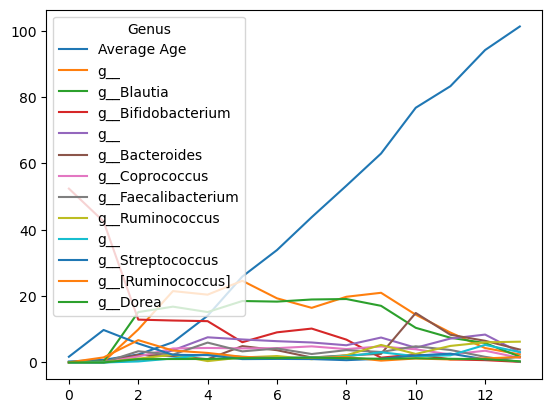

In [8]:
genus_corr.plot()
# Something is wrong here 

In [9]:
corr = genus_corr.corr()
# Plot average age of each group against abundance of bifidobacterium

corr_age = corr["Average Age"]

corr_age

Genus
Average Age            1.000000
g__                   -0.125086
g__Blautia            -0.154417
g__Bifidobacterium    -0.707522
g__                    0.516880
g__Bacteroides         0.626165
g__Coprococcus         0.217625
g__Faecalibacterium    0.034433
g__Ruminococcus        0.876039
g__                    0.791015
g__Streptococcus      -0.459259
g__[Ruminococcus]     -0.420098
g__Dorea               0.243862
Name: Average Age, dtype: float64

### Linear regression

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [11]:
X = genus_corr[["Average Age"]]
y = genus_corr["g__Ruminococcus"]

model.fit(X, y)

LinearRegression()

In [12]:
pred = pd.DataFrame({"Average Age": [0, 102]})  # Make a new DataFrame containing the X values
pred["y"] = model.predict(pred)  # Make a prediction and add that data into the table
pred

,Average Age,y
0,0,0.282776
1,102,5.702996


<Axes: xlabel='Average Age', ylabel='g__Ruminococcus'>

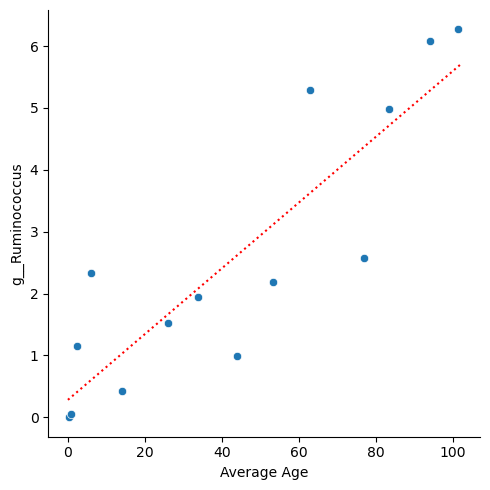

In [13]:
import seaborn as sns
sns.relplot(data=genus_corr, x="Average Age", y="g__Ruminococcus")
sns.lineplot(data=pred, x="Average Age", y="y", c="red", linestyle=":")

In [14]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

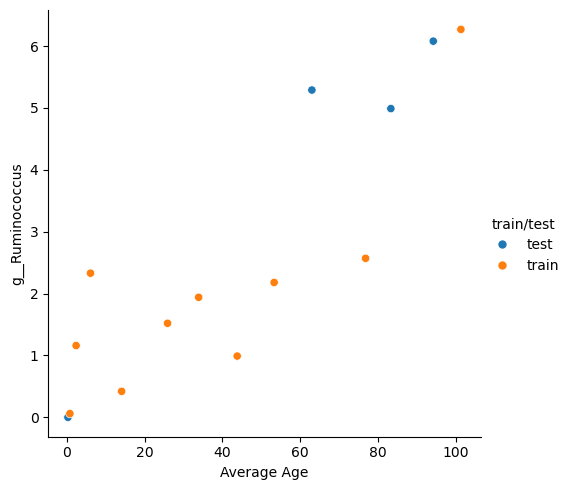

In [15]:
import seaborn as sns

# Label the original DataFrame with the test/train split
# This is just used for plotting purposes
genus_corr.loc[train_X.index, "train/test"] = "train"
genus_corr.loc[test_X.index, "train/test"] = "test"

sns.relplot(data=genus_corr, x="Average Age", y="g__Ruminococcus", hue="train/test")

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(train_X, train_y)

LinearRegression()

In [17]:
model.score(test_X, test_y)

0.6026118674944115